In [1]:
import glob
import os


# Reminder to install s3fs to read files from aws
import s3fs

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

# import holoviews as hv
# hv.extension('bokeh')
# hv.archive.auto()

%matplotlib inline

In [2]:
# csv_prefix = '/mnt/data/tabula-muris-sourmash-compare-ignore-abundance-'
csv_prefix = 's3://olgabot-maca/facs/sourmash_compare_no_track_abundance_combined/'
! aws s3 ls $csv_prefix

2018-09-23 16:03:11  350735969 -similarity.parquet
2018-09-23 17:36:09     104782 cell-metadata.csv
2018-09-23 17:36:09       7857 experiment-metadata.csv
2018-09-23 17:36:09 6503843924 similarity.csv
2018-09-23 17:35:32  681313514 similarity.parquet


In [105]:
experiment_metadata = pd.read_csv(f'{csv_prefix}experiment-metadata.csv', index_col=0)
print(experiment_metadata.shape)
experiment_metadata.head()

(910, 4)


,comparison_sequence,ksize,scaled,trim
trim=false_scaled=1000_dna_ksize=12,dna,12,1000,False
trim=false_scaled=1000_dna_ksize=15,dna,15,1000,False
trim=false_scaled=1000_dna_ksize=18,dna,18,1000,False
trim=false_scaled=1000_dna_ksize=21,dna,21,1000,False
trim=false_scaled=1000_dna_ksize=24,dna,24,1000,False


In [4]:
cell_metadata = pd.read_csv(f'{csv_prefix}cell-metadata.csv', index_col=0)
print(cell_metadata.shape)
cell_metadata.head()

(1000, 5)


,tissue,subtissue,cell_ontology_class,free_annotation,cell_ontology_free_annotation
cell_id,,,,,
A1-B002427-3_39_F-1-1,Heart,LA,myofibroblast_cell,NaN,myofibroblast_cell (NA)
A1-D041914-3_8_M-1-1,Bladder,NaN,bladder_cell,Bladder_mesenchymal_cell,bladder_cell (Bladder_mesenchymal_cell)
A1-MAA000496-3_10_M-1-1,Trachea,NaN,mesenchymal_cell,NaN,mesenchymal_cell (NA)
A1-MAA000549-3_8_M-1-1,Skin,Anagen,epidermal_cell,Intermediate_IFE,epidermal_cell (Intermediate_IFE)
A1-MAA001869-3_38_F-1-1,Large_Intestine,Proximal,epithelial_cell_of_large_intestine,Lgr5-_amplifying_undifferentiated_cell,epithelial_cell_of_large_intestine (Lgr5-_ampl...


In [100]:
compare_results = pd.read_parquet(f'{csv_prefix}similarity-scaled-subset.parquet')
print(compare_results.shape)
compare_results.head()

(56618998, 4)


,cell_id,other_cell,similarity,experiment
0,B22-MAA000871-3_11_M-1-1,B22-MAA000871-3_11_M-1-1,1.000000,trim=false_scaled=1000_dna_ksize=12
1,B22-MAA000871-3_11_M-1-1,L11-MAA000586-3_8_M-1-1,0.398906,trim=false_scaled=1000_dna_ksize=12
2,B22-MAA000871-3_11_M-1-1,O20-MAA001632-3_56_F-1-1,0.407873,trim=false_scaled=1000_dna_ksize=12
3,B22-MAA000871-3_11_M-1-1,D2-MAA000452-3_8_M-1-1,0.386677,trim=false_scaled=1000_dna_ksize=12
4,B22-MAA000871-3_11_M-1-1,P1-D042473-3_10_M-1-1,0.384180,trim=false_scaled=1000_dna_ksize=12


In [104]:
compare_results_experiments = compare_results.experiment.unique()
print(len(compare_results_experiments))
compare_results_experiments[:10]

146


array(['trim=false_scaled=1000_dna_ksize=12',
       'trim=false_scaled=1000_dna_ksize=15',
       'trim=false_scaled=1000_dna_ksize=18',
       'trim=false_scaled=1000_dna_ksize=21',
       'trim=false_scaled=1000_dna_ksize=24',
       'trim=false_scaled=1000_dna_ksize=27',
       'trim=false_scaled=1000_dna_ksize=3',
       'trim=false_scaled=1000_dna_ksize=30',
       'trim=false_scaled=1000_dna_ksize=33',
       'trim=false_scaled=1000_dna_ksize=36'], dtype=object)

In [107]:
experiment_metadata = experiment_metadata.loc[compare_results_experiments]
print(experiment_metadata.shape)
experiment_metadata.head()

(146, 4)


,comparison_sequence,ksize,scaled,trim
trim=false_scaled=1000_dna_ksize=12,dna,12,1000,False
trim=false_scaled=1000_dna_ksize=15,dna,15,1000,False
trim=false_scaled=1000_dna_ksize=18,dna,18,1000,False
trim=false_scaled=1000_dna_ksize=21,dna,21,1000,False
trim=false_scaled=1000_dna_ksize=24,dna,24,1000,False


## Only look at trim=True for now

In [6]:
trimmed_rows = experiment_metadata.loc[compare_results.experiment, 'trim']
print(trimmed_rows.shape)
trimmed_rows.head()

(28620778,)


trim=false_scaled=1000_dna_ksize=15    False
trim=false_scaled=1000_dna_ksize=15    False
trim=false_scaled=1000_dna_ksize=15    False
trim=false_scaled=1000_dna_ksize=15    False
trim=false_scaled=1000_dna_ksize=15    False
Name: trim, dtype: bool

In [101]:
experiment_metadata_trimmed = experiment_metadata.query('trim == True')
print(experiment_metadata_trimmed.shape)
experiment_metadata_trimmed.head()

(69, 4)


,comparison_sequence,ksize,scaled,trim
trim=true_scaled=1000_dna_ksize=12,dna,12,1000,True
trim=true_scaled=1000_dna_ksize=18,dna,18,1000,True
trim=true_scaled=1000_dna_ksize=33,dna,33,1000,True
trim=true_scaled=1000_dna_ksize=39,dna,39,1000,True
trim=true_scaled=1000_dna_ksize=42,dna,42,1000,True


In [7]:
compare_results_trim_true = compare_results.loc[trimmed_rows.values]
print(compare_results_trim_true.shape)
compare_results_trim_true.head()

(12482005, 4)


,cell_id,other_cell,similarity,experiment
16138773,H5-B000127-3_38_F-1-1,H5-B000127-3_38_F-1-1,1.000000,trim=true_scaled=1100_dna_ksize=18
16138774,H5-B000127-3_38_F-1-1,E18-MAA000908-3_10_M-1-1,0.027140,trim=true_scaled=1100_dna_ksize=18
16138775,H5-B000127-3_38_F-1-1,E5-D042479-3_8_M-1-1,0.038163,trim=true_scaled=1100_dna_ksize=18
16138776,H5-B000127-3_38_F-1-1,L1-D042475-3_9_M-1-1,0.034971,trim=true_scaled=1100_dna_ksize=18
16138777,H5-B000127-3_38_F-1-1,G15-D042475-3_9_M-1-1,0.032866,trim=true_scaled=1100_dna_ksize=18


CPU times: user 60 ms, sys: 0 ns, total: 60 ms
Wall time: 60.7 ms
CPU times: user 52 ms, sys: 0 ns, total: 52 ms
Wall time: 51.7 ms


cell_id                   experiment                        
A12-B001689-3_38_F-1-1    trim=true_scaled=1100_dna_ksize=18                       microglial_cell
E18-MAA000908-3_10_M-1-1  trim=true_scaled=1100_dna_ksize=18                      endothelial_cell
E5-D042479-3_8_M-1-1      trim=true_scaled=1100_dna_ksize=18                      precursor_B_cell
G15-D042475-3_9_M-1-1     trim=true_scaled=1100_dna_ksize=18                          myeloid_cell
H5-B000127-3_38_F-1-1     trim=true_scaled=1100_dna_ksize=18                      endothelial_cell
I2-B002438-3_38_F-1-1     trim=true_scaled=1100_dna_ksize=18                            basal_cell
I6-MAA000884-3_10_M-1-1   trim=true_scaled=1100_dna_ksize=18                type_B_pancreatic_cell
K15-MAA000907-3_11_M-1-1  trim=true_scaled=1100_dna_ksize=18    epithelial_cell_of_proximal_tubule
L1-D042475-3_9_M-1-1      trim=true_scaled=1100_dna_ksize=18                      mesenchymal_cell
P1-MAA000938-3_8_M-1-1    trim=true_scaled=1100_

In [42]:
s = cell_metadata['cell_ontology_class'][subset.query('cell_id == "G15-D042475-3_9_M-1-1"').nlargest(10, 'similarity')['other_cell']]
s

other_cell
G15-D042475-3_9_M-1-1         blood_cell
M8-D045139-3_39_F-1-1        granulocyte
E14-MAA000388-3_11_M-1-1    myeloid_cell
F17-D042479-3_8_M-1-1        granulocyte
I10-D045058-3_39_F-1-1      myeloid_cell
F8-B002954-3_56_F-1-1       myeloid_cell
M13-MAA000531-3_8_M-1-1     myeloid_cell
A16-D043520-3_39_F-1-1      myeloid_cell
M2-MAA000639-3_9_M-1-1       granulocyte
D15-MAA000441-3_10_M-1-1    myeloid_cell
Name: cell_ontology_class, dtype: object

In [44]:
s.mode()

0    myeloid_cell
dtype: object

In [45]:
s.max()

'myeloid_cell'

In [143]:
subset = compare_results_trim_true.head(10000)
groupby_cols = ['cell_id', 'experiment']

def guess_cell_ontology(cell_subset, n=5, col='cell_ontology_class'):
    neighboring_cells = cell_subset.nlargest(n, 'similarity')['other_cell']
    neighoring_ontologies = cell_metadata[col][neighboring_cells]
    return neighoring_ontologies.astype(str).mode()[0]

%time subset.query('similarity < 1').groupby(groupby_cols).apply(guess_cell_ontology)
%time subset.groupby(groupby_cols).apply(guess_cell_ontology)

CPU times: user 52 ms, sys: 0 ns, total: 52 ms
Wall time: 50.2 ms
CPU times: user 44 ms, sys: 0 ns, total: 44 ms
Wall time: 43.1 ms


cell_id                   experiment                        
A12-B001689-3_38_F-1-1    trim=true_scaled=1100_dna_ksize=18            microglial_cell
E18-MAA000908-3_10_M-1-1  trim=true_scaled=1100_dna_ksize=18           endothelial_cell
E5-D042479-3_8_M-1-1      trim=true_scaled=1100_dna_ksize=18           precursor_B_cell
G15-D042475-3_9_M-1-1     trim=true_scaled=1100_dna_ksize=18                granulocyte
H5-B000127-3_38_F-1-1     trim=true_scaled=1100_dna_ksize=18           endothelial_cell
I2-B002438-3_38_F-1-1     trim=true_scaled=1100_dna_ksize=18                 basal_cell
I6-MAA000884-3_10_M-1-1   trim=true_scaled=1100_dna_ksize=18          pancreatic_D_cell
K15-MAA000907-3_11_M-1-1  trim=true_scaled=1100_dna_ksize=18               Kupffer_cell
L1-D042475-3_9_M-1-1      trim=true_scaled=1100_dna_ksize=18               bladder_cell
P1-MAA000938-3_8_M-1-1    trim=true_scaled=1100_dna_ksize=18    basal_cell_of_epidermis
P8-MAA000571-3_9_M-1-1    trim=true_scaled=1100_dna_ksize=1

In [144]:
groupby_cols = ['cell_id', 'experiment']

grouped = compare_results.query('similarity < 1').groupby(groupby_cols)
%time guessed_ontology_n5 = grouped.apply(guess_cell_ontology, n=5)
print(guessed_ontology_n5.shape)
guessed_ontology_n5.head()

CPU times: user 5min 37s, sys: 6.18 s, total: 5min 43s
Wall time: 5min 12s
(125188,)


cell_id                experiment                         
A1-B002427-3_39_F-1-1  trim=false_scaled=1000_dna_ksize=12      basal_cell
                       trim=false_scaled=1000_dna_ksize=15    bladder_cell
                       trim=false_scaled=1000_dna_ksize=18    bladder_cell
                       trim=false_scaled=1000_dna_ksize=24    bladder_cell
                       trim=false_scaled=1000_dna_ksize=27      basal_cell
dtype: object

In [145]:
%time guessed_ontology_n10 = grouped.apply(guess_cell_ontology, n=10)
print(guessed_ontology_n10.shape)
guessed_ontology_n10.head()

CPU times: user 5min 33s, sys: 6.81 s, total: 5min 39s
Wall time: 5min 7s
(125188,)


cell_id                experiment                         
A1-B002427-3_39_F-1-1  trim=false_scaled=1000_dna_ksize=12                          basal_cell
                       trim=false_scaled=1000_dna_ksize=15                        bladder_cell
                       trim=false_scaled=1000_dna_ksize=18                        bladder_cell
                       trim=false_scaled=1000_dna_ksize=24    mesenchymal_stem_cell_of_adipose
                       trim=false_scaled=1000_dna_ksize=27                          basal_cell
dtype: object

In [146]:
guessed_ontology_n5_wide = guessed_ontology_n5.unstack()
print(guessed_ontology_n5_wide.shape)
guessed_ontology_n5_wide.head()

(1000, 144)


experiment,trim=false_scaled=1000_dna_ksize=12,trim=false_scaled=1000_dna_ksize=15,trim=false_scaled=1000_dna_ksize=18,trim=false_scaled=1000_dna_ksize=21,trim=false_scaled=1000_dna_ksize=24,trim=false_scaled=1000_dna_ksize=27,trim=false_scaled=1000_dna_ksize=3,trim=false_scaled=1000_dna_ksize=30,trim=false_scaled=1000_dna_ksize=33,trim=false_scaled=1000_dna_ksize=36,...,trim=true_scaled=500_dna_ksize=30,trim=true_scaled=500_dna_ksize=36,trim=true_scaled=500_dna_ksize=39,trim=true_scaled=500_dna_ksize=42,trim=true_scaled=500_dna_ksize=45,trim=true_scaled=500_dna_ksize=48,trim=true_scaled=500_dna_ksize=54,trim=true_scaled=500_dna_ksize=57,trim=true_scaled=500_dna_ksize=60,trim=true_scaled=500_dna_ksize=9
cell_id,,,,,,,,,,,,,,,,,,,,,
A1-B002427-3_39_F-1-1,basal_cell,bladder_cell,bladder_cell,NaN,bladder_cell,basal_cell,Slamf1-negative_multipotent_progenitor_cell,bladder_cell,NaN,NaN,...,bladder_cell,basal_cell,bladder_cell,bladder_cell,bladder_cell,luminal_epithelial_cell_of_mammary_gland,bladder_cell,bladder_cell,bladder_cell,B_cell
A1-D041914-3_8_M-1-1,bladder_cell,basal_cell,mesenchymal_stem_cell_of_adipose,luminal_epithelial_cell_of_mammary_gland,mesenchymal_stem_cell_of_adipose,bladder_cell,epithelial_cell_of_large_intestine,bladder_cell,bladder_cell,bladder_cell,...,bladder_cell,mesenchymal_stem_cell_of_adipose,bladder_cell,fibroblast,bladder_cell,bladder_cell,fibroblast,bladder_cell,bladder_cell,T_cell
A1-MAA000496-3_10_M-1-1,hepatocyte,bladder_cell,bladder_cell,bladder_cell,mesenchymal_stem_cell_of_adipose,fibroblast,microglial_cell,bladder_cell,bladder_cell,bladder_cell,...,bladder_cell,mesenchymal_stem_cell_of_adipose,bladder_cell,bladder_cell,bladder_cell,bladder_cell,bladder_cell,bladder_cell,stromal_cell,endothelial_cell
A1-MAA000549-3_8_M-1-1,basal_cell_of_epidermis,bladder_cell,bladder_urothelial_cell,basal_cell_of_epidermis,bladder_urothelial_cell,basal_cell_of_epidermis,epidermal_cell,basal_cell_of_epidermis,basal_cell_of_epidermis,basal_cell_of_epidermis,...,bladder_urothelial_cell,basal_cell_of_epidermis,keratinocyte_stem_cell,bladder_urothelial_cell,basal_cell,luminal_epithelial_cell_of_mammary_gland,luminal_epithelial_cell_of_mammary_gland,keratinocyte,basal_cell_of_epidermis,T_cell
A1-MAA001869-3_38_F-1-1,brain_pericyte,epithelial_cell_of_large_intestine,epithelial_cell_of_large_intestine,epithelial_cell_of_large_intestine,epithelial_cell_of_large_intestine,epithelial_cell_of_large_intestine,B_cell,epithelial_cell_of_large_intestine,cardiac_muscle_cell,cardiac_muscle_cell,...,epithelial_cell_of_large_intestine,epithelial_cell_of_large_intestine,epithelial_cell_of_large_intestine,epithelial_cell_of_large_intestine,epithelial_cell_of_large_intestine,epithelial_cell_of_large_intestine,epithelial_cell_of_large_intestine,enterocyte_of_epithelium_of_large_intestine,epithelial_cell_of_large_intestine,B_cell


In [147]:
cell_metadata['cell_ontology_class'].head()

cell_id
A1-B002427-3_39_F-1-1                      myofibroblast_cell
A1-D041914-3_8_M-1-1                             bladder_cell
A1-MAA000496-3_10_M-1-1                      mesenchymal_cell
A1-MAA000549-3_8_M-1-1                         epidermal_cell
A1-MAA001869-3_38_F-1-1    epithelial_cell_of_large_intestine
Name: cell_ontology_class, dtype: object

In [148]:
from sklearn.metrics import precision_recall_fscore_support

truth = cell_metadata['cell_ontology_class'].astype(str)
labels = sorted(truth.unique())
predicted = guessed_ontology_n5_wide.iloc[:, 0].astype(str)


precision, recall, fscore, support = precision_recall_fscore_support(truth, predicted, 
                                labels=labels, average='weighted')
precision

/home/olga/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.25431751589928137

In [159]:
import warnings

def score_ontology_guesses(guessed_ontology_wide, truth=cell_metadata['cell_ontology_class'].astype(str)):
    
    labels = sorted(truth.unique())

    # There's some crazy error here so we're ignoring it
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        data = guessed_ontology_wide.apply(
            lambda x: precision_recall_fscore_support(truth, x.astype(str), 
                                                      labels=labels, average='weighted'))

    scores = pd.DataFrame(list(data.values), 
                                              columns=['precision', 'recall', 'fscore', 'support'],
                                              index=guessed_ontology_wide.columns)
    return scores

guessed_ontology_n5_scores = score_ontology_guesses(guessed_ontology_n5_wide)
print(guessed_ontology_n5_scores.shape)
guessed_ontology_n5_scores.head()

(144, 4)


,precision,recall,fscore,support
experiment,,,,
trim=false_scaled=1000_dna_ksize=12,0.254318,0.107,0.089423,None
trim=false_scaled=1000_dna_ksize=15,0.587692,0.493,0.481680,None
trim=false_scaled=1000_dna_ksize=18,0.597231,0.518,0.498254,None
trim=false_scaled=1000_dna_ksize=21,0.526828,0.377,0.416493,None
trim=false_scaled=1000_dna_ksize=24,0.594575,0.513,0.492528,None


In [166]:
guessed_ontology_n5_scores_metadata = guessed_ontology_n5_scores.join(experiment_metadata)
print(guessed_ontology_n5_scores_metadata.shape)
guessed_ontology_n5_scores_metadata.head()

(144, 8)


,precision,recall,fscore,support,comparison_sequence,ksize,scaled,trim
experiment,,,,,,,,
trim=false_scaled=1000_dna_ksize=12,0.254318,0.107,0.089423,None,dna,12,1000,False
trim=false_scaled=1000_dna_ksize=15,0.587692,0.493,0.481680,None,dna,15,1000,False
trim=false_scaled=1000_dna_ksize=18,0.597231,0.518,0.498254,None,dna,18,1000,False
trim=false_scaled=1000_dna_ksize=21,0.526828,0.377,0.416493,None,dna,21,1000,False
trim=false_scaled=1000_dna_ksize=24,0.594575,0.513,0.492528,None,dna,24,1000,False


In [160]:
guessed_ontology_n10_wide = guessed_ontology_n10.unstack()

guessed_ontology_n10_scores = score_ontology_guesses(guessed_ontology_n10_wide)
print(guessed_ontology_n10_scores.shape)
guessed_ontology_n10_scores.head()

(144, 4)


,precision,recall,fscore,support
experiment,,,,
trim=false_scaled=1000_dna_ksize=12,0.248864,0.101,0.082024,None
trim=false_scaled=1000_dna_ksize=15,0.599319,0.473,0.465406,None
trim=false_scaled=1000_dna_ksize=18,0.521497,0.491,0.457005,None
trim=false_scaled=1000_dna_ksize=21,0.467199,0.371,0.397123,None
trim=false_scaled=1000_dna_ksize=24,0.528183,0.498,0.465194,None


In [161]:
sorted(experiment_metadata['scaled'].unique())

[500, 1000, 2000, 5000]

In [162]:
guessed_ontology_n10_scores_metadata = guessed_ontology_n10_scores.join(experiment_metadata)
guessed_ontology_n10_scores_metadata.head()

,precision,recall,fscore,support,comparison_sequence,ksize,scaled,trim
experiment,,,,,,,,
trim=false_scaled=1000_dna_ksize=12,0.248864,0.101,0.082024,None,dna,12,1000,False
trim=false_scaled=1000_dna_ksize=15,0.599319,0.473,0.465406,None,dna,15,1000,False
trim=false_scaled=1000_dna_ksize=18,0.521497,0.491,0.457005,None,dna,18,1000,False
trim=false_scaled=1000_dna_ksize=21,0.467199,0.371,0.397123,None,dna,21,1000,False
trim=false_scaled=1000_dna_ksize=24,0.528183,0.498,0.465194,None,dna,24,1000,False


/home/olga/miniconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


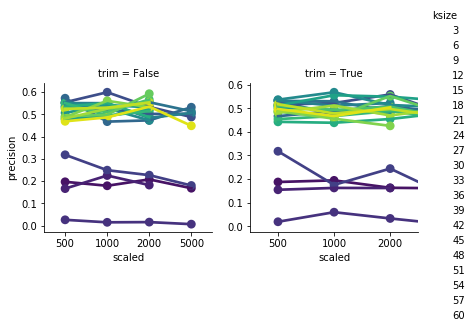

In [168]:
g = sns.FacetGrid(guessed_ontology_n10_scores_metadata, 
                  col='trim', palette='viridis',
                  hue='ksize', sharex=False, sharey=False)
g.map(sns.pointplot, 'scaled', 'precision', )
g.add_legend()

/home/olga/miniconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


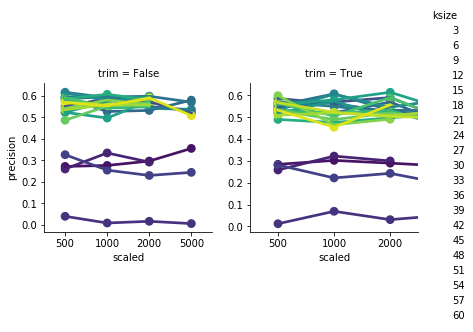

In [167]:
g = sns.FacetGrid(guessed_ontology_n5_scores_metadata, 
                  col='trim', palette='viridis',
                  hue='ksize', sharex=False, sharey=False)
g.map(sns.pointplot, 'scaled', 'precision', )
g.add_legend()

/home/olga/miniconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


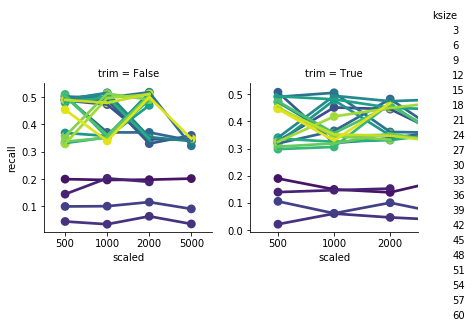

In [164]:
g = sns.FacetGrid(guessed_ontology_n10_scores_metadata, 
                  col='trim', palette='viridis',
                  hue='ksize', sharex=False, sharey=False)
g.map(sns.pointplot, 'scaled', 'recall', )
g.add_legend()

/home/olga/miniconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


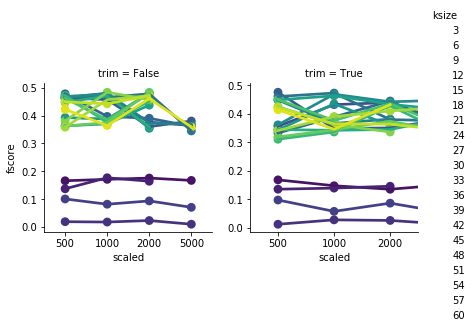

In [165]:
g = sns.FacetGrid(guessed_ontology_n10_scores_metadata, 
                  col='trim', palette='viridis',
                  hue='ksize', sharex=False, sharey=False)
g.map(sns.pointplot, 'scaled', 'fscore' )
g.add_legend()

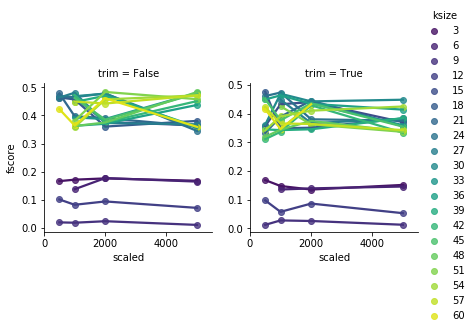

In [156]:
g = sns.FacetGrid(guessed_ontology_n10_scores_metadata, 
                  col='trim', palette='viridis',
                  hue='ksize', sharex=False, sharey=False)
g.map(sns.regplot, 'scaled', 'fscore', lowess=True)
g.set(xlim=(0, 5500))
g.add_legend()

/home/olga/miniconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


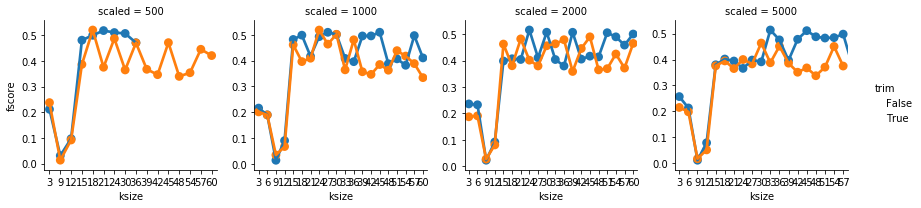

In [171]:
g = sns.FacetGrid(guessed_ontology_n5_scores_metadata, 
                  col='scaled',
                  hue='trim', sharex=False, sharey=False)
g.map(sns.pointplot, 'ksize', 'fscore')
# g.set(xlim=(0, 5500))
g.add_legend()

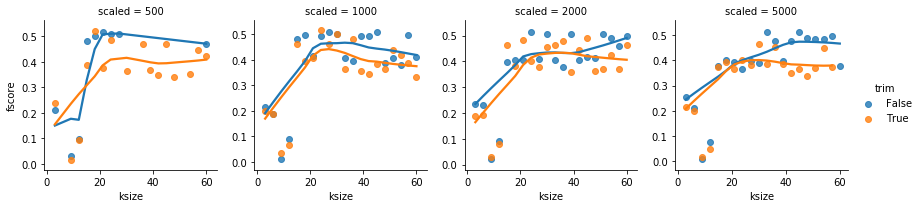

In [169]:
g = sns.FacetGrid(guessed_ontology_n5_scores_metadata, 
                  col='scaled',
                  hue='trim', sharex=False, sharey=False)
g.map(sns.regplot, 'ksize', 'fscore', lowess=True)
# g.set(xlim=(0, 5500))
g.add_legend()

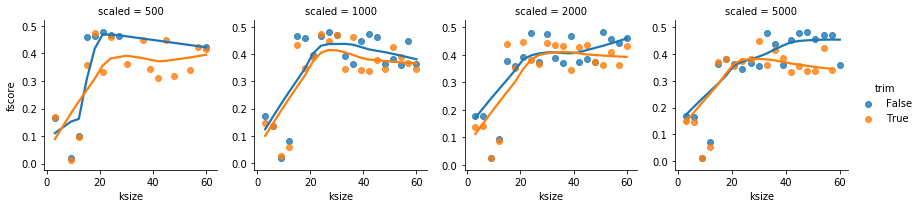

In [170]:
g = sns.FacetGrid(guessed_ontology_n10_scores_metadata, 
                  col='scaled',
                  hue='trim', sharex=False, sharey=False)
g.map(sns.regplot, 'ksize', 'fscore', lowess=True)
# g.set(xlim=(0, 5500))
g.add_legend()

In [158]:
# trim_true_scaled1100_dna_ksize_18 = pd.read_csv('s3://olgabot-maca/facs/sourmash_compare_no_track_abundance/trim=true_scaled=1100_dna_ksize=18.csv')
# print(trim_true_scaled1100_dna_ksize_18.shape)
# trim_true_scaled1100_dna_ksize_18.head()

In [132]:
(cell_ids == 'A1-B002427-3_39_F-1-1').sum()

1

In [133]:
cell_ids = df.columns.str.split('|').str[0]
cell_ids
trim_true_scaled1100_dna_ksize_18.columns = trim_true_scaled1100_dna_ksize_18.index = cell_ids
trim_true_scaled1100_dna_ksize_18.head()

,H5-B000127-3_38_F-1-1,E18-MAA000908-3_10_M-1-1,E5-D042479-3_8_M-1-1,L1-D042475-3_9_M-1-1,G15-D042475-3_9_M-1-1,A12-B001689-3_38_F-1-1,K15-MAA000907-3_11_M-1-1,I6-MAA000884-3_10_M-1-1,I2-B002438-3_38_F-1-1,P8-MAA000571-3_9_M-1-1,...,N9-MAA000593-3_8_M-1-1,A2-MAA000909-3_10_M-1-1,I17-MAA000920-3_11_M-1-1,P19-MAA000593-3_8_M-1-1,K13-MAA000442-3_11_M-1-1,D17-MAA000617-3_10_M-1-1,M7-MAA000531-3_8_M-1-1,F3-MAA000848-3_10_M-1-1,G6-MAA001871-3_39_F-1-1,F9-MAA000611-3_8_M-1-1
H5-B000127-3_38_F-1-1,1.000000,0.027140,0.038163,0.034971,0.032866,0.037230,0.036039,0.031600,0.028872,0.022105,...,0.033259,0.026113,0.027120,0.037776,0.038759,0.025873,0.035129,0.024869,0.023591,0.023699
E18-MAA000908-3_10_M-1-1,0.027140,1.000000,0.037292,0.044087,0.024841,0.031663,0.025094,0.037032,0.041199,0.029072,...,0.033584,0.049507,0.046187,0.034700,0.034724,0.034234,0.052846,0.039724,0.050605,0.049275
E5-D042479-3_8_M-1-1,0.038163,0.037292,1.000000,0.052959,0.043952,0.051118,0.041680,0.048105,0.047342,0.030516,...,0.055129,0.053896,0.043088,0.059946,0.054306,0.037975,0.053315,0.043964,0.050330,0.048903
L1-D042475-3_9_M-1-1,0.034971,0.044087,0.052959,1.000000,0.036335,0.045522,0.037773,0.049140,0.063775,0.032409,...,0.044549,0.064648,0.074038,0.045044,0.048865,0.040992,0.084092,0.047597,0.061502,0.061103
G15-D042475-3_9_M-1-1,0.032866,0.024841,0.043952,0.036335,1.000000,0.036492,0.038382,0.032858,0.027301,0.020083,...,0.040848,0.026894,0.025268,0.046512,0.047159,0.026143,0.033757,0.022667,0.022505,0.023941


In [16]:
from extract_metadata import extract_cell_metadata

trim_true_scaled1100_dna_ksize_18_metadata = extract_cell_metadata(df.columns)

print(trim_true_scaled1100_dna_ksize_18_metadata.shape)
trim_true_scaled1100_dna_ksize_18_metadata.head()

(993, 5)


column,cell_ontology_class,free_annotation,subtissue,tissue,cell_ontology_free_annotation
level_0,,,,,
0,endothelial_cell,NA,SCAT,Fat,endothelial_cell (NA)
1,endothelial_cell,NA,NA,Aorta,endothelial_cell (NA)
2,precursor_B_cell,pre-B_cell_,B-cells,Marrow,precursor_B_cell (pre-B_cell_)
3,mesenchymal_cell,NA,NA,Trachea,mesenchymal_cell (NA)
4,blood_cell,NA,NA,Trachea,blood_cell (NA)


In [9]:
trimmed_rows.head()

trim=false_scaled=1000_dna_ksize=15    False
trim=false_scaled=1000_dna_ksize=15    False
trim=false_scaled=1000_dna_ksize=15    False
trim=false_scaled=1000_dna_ksize=15    False
trim=false_scaled=1000_dna_ksize=15    False
Name: trim, dtype: bool

## Look at similarities relative to bladder mesenchymal cell

In [179]:
cell_metadata.head()

,tissue,subtissue,cell_ontology_class,free_annotation,cell_ontology_free_annotation
cell_id,,,,,
A1-B002427-3_39_F-1-1,Heart,LA,myofibroblast_cell,NaN,myofibroblast_cell (NA)
A1-D041914-3_8_M-1-1,Bladder,NaN,bladder_cell,Bladder_mesenchymal_cell,bladder_cell (Bladder_mesenchymal_cell)
A1-MAA000496-3_10_M-1-1,Trachea,NaN,mesenchymal_cell,NaN,mesenchymal_cell (NA)
A1-MAA000549-3_8_M-1-1,Skin,Anagen,epidermal_cell,Intermediate_IFE,epidermal_cell (Intermediate_IFE)
A1-MAA001869-3_38_F-1-1,Large_Intestine,Proximal,epithelial_cell_of_large_intestine,Lgr5-_amplifying_undifferentiated_cell,epithelial_cell_of_large_intestine (Lgr5-_ampl...


In [185]:
bladder_cells = cell_metadata.query('tissue == "Bladder"').index
print(bladder_cells.shape)
bladder_cells[:10]

(33,)


Index(['A1-D041914-3_8_M-1-1', 'A13-D041914-3_8_M-1-1', 'A7-D041914-3_8_M-1-1',
       'A8-MAA000487-3_10_M-1-1', 'B22-MAA000487-3_10_M-1-1',
       'B3-MAA000487-3_10_M-1-1', 'C11-MAA000487-3_10_M-1-1',
       'C16-D041914-3_8_M-1-1', 'C8-D041914-3_8_M-1-1',
       'D1-B002764-3_38_F-1-1'],
      dtype='object', name='cell_id')

In [187]:
compare_results.query('cell_id in @bladder_cells').groupby(['cell_id']).apply(lambda x: x['experiment'].nunique())

cell_id
A1-D041914-3_8_M-1-1        137
A13-D041914-3_8_M-1-1       146
A7-D041914-3_8_M-1-1        119
A8-MAA000487-3_10_M-1-1     128
B22-MAA000487-3_10_M-1-1    131
B3-MAA000487-3_10_M-1-1     137
C11-MAA000487-3_10_M-1-1    113
C16-D041914-3_8_M-1-1       116
C8-D041914-3_8_M-1-1        125
D1-B002764-3_38_F-1-1       117
D21-B002764-3_38_F-1-1      110
E14-D042253-3_9_M-1-1       125
E21-D041914-3_8_M-1-1       128
E22-D042253-3_9_M-1-1       137
G15-D042253-3_9_M-1-1       113
G20-B002764-3_38_F-1-1       92
H2-B002764-3_38_F-1-1       112
H20-D042253-3_9_M-1-1       131
H6-D042253-3_9_M-1-1        146
I10-B000610-3_56_F-1-1      125
J10-D041914-3_8_M-1-1       128
J12-B002764-3_38_F-1-1      125
J20-D041914-3_8_M-1-1       104
J21-D041914-3_8_M-1-1       137
K16-B000610-3_56_F-1-1      146
K2-D042253-3_9_M-1-1        122
K9-D041914-3_8_M-1-1        131
N13-B000610-3_56_F-1-1      113
N18-MAA000487-3_10_M-1-1    134
N19-D041914-3_8_M-1-1       122
O10-MAA000487-3_10_M-1-1    134


In [188]:
bladder_cell = 'A1-D041914-3_8_M-1-1'

similarity_bladder_cell = compare_results.query('cell_id == @bladder_cell')
similarity_bladder_cell = similarity_bladder_cell.join(cell_metadata, on='other_cell')
similarity_bladder_cell = similarity_bladder_cell.join(experiment_metadata, on='experiment')
print(similarity_bladder_cell.shape)
similarity_bladder_cell.head()

(54615, 13)


,cell_id,other_cell,similarity,experiment,tissue,subtissue,cell_ontology_class,free_annotation,cell_ontology_free_annotation,comparison_sequence,ksize,scaled,trim
386347,A1-D041914-3_8_M-1-1,A1-D041914-3_8_M-1-1,1.000000,trim=false_scaled=1000_dna_ksize=12,Bladder,NaN,bladder_cell,Bladder_mesenchymal_cell,bladder_cell (Bladder_mesenchymal_cell),dna,12,1000,False
386348,A1-D041914-3_8_M-1-1,J1-B000634-3_56_F-1-1,0.538661,trim=false_scaled=1000_dna_ksize=12,Heart,LA,fibroblast,NaN,fibroblast (NA),dna,12,1000,False
386349,A1-D041914-3_8_M-1-1,L22-MAA000752-3_10_M-1-1,0.432674,trim=false_scaled=1000_dna_ksize=12,Kidney,NaN,epithelial_cell_of_proximal_tubule,NaN,epithelial_cell_of_proximal_tubule (NA),dna,12,1000,False
386350,A1-D041914-3_8_M-1-1,J5-MAA000934-3_9_M-1-1,0.529394,trim=false_scaled=1000_dna_ksize=12,Fat,SCAT,mesenchymal_stem_cell_of_adipose,mesenchymal_progenitor,mesenchymal_stem_cell_of_adipose (mesenchymal_...,dna,12,1000,False
386351,A1-D041914-3_8_M-1-1,F5-B001689-3_38_F-1-1,0.436136,trim=false_scaled=1000_dna_ksize=12,Brain_Myeloid,Hippocampus,microglial_cell,NaN,microglial_cell (NA),dna,12,1000,False


In [189]:
sorted(similarity_bladder_cell.ksize.unique())

[3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60]

In [190]:
sorted(similarity_bladder_cell.scaled.unique())

[500, 1000, 2000, 5000]

### Look at overall similarity distribution within scaled, ksize

/home/olga/miniconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


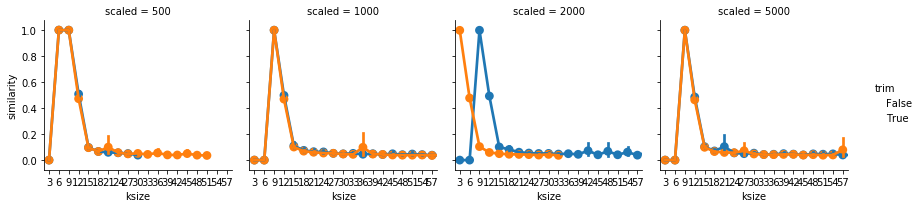

In [200]:
g = sns.FacetGrid(similarity_bladder_cell, hue='trim', col='scaled')
g.map(sns.pointplot, 'ksize', 'similarity')
g.add_legend()

/home/olga/miniconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/olga/miniconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


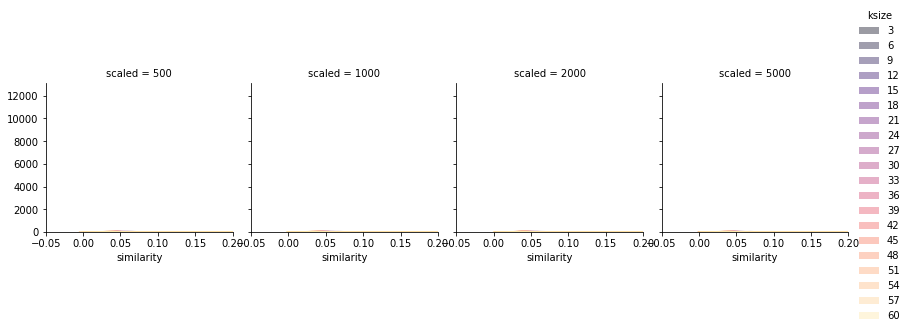

In [195]:
g = sns.FacetGrid(similarity_bladder_cell, hue='ksize', col_wrap=4, col='scaled', palette='magma')
g.map(sns.distplot, 'similarity')
g.set(xlim=(-0.05, 0.2))
g.add_legend()

### Get tissue colors from paper

In [196]:
range(3)

range(0, 3)

In [197]:
tissue_colors = pd.read_csv('/home/olga/tabula-muris/00_data_ingest/15_color_palette/tissue_colors.csv', 
                            squeeze=True, index_col=0)
tissue_colors.head()

Aorta                #1f77b4
Bladder              #aec7e8
Brain_Myeloid        #ff7f0e
Brain_Non-Myeloid    #ffbb78
Diaphragm            #2ca02c
Name: color, dtype: object

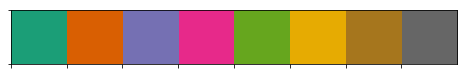

In [198]:
dark2 = sns.color_palette('Dark2')
sns.palplot(dark2)

bladder = 'Bladder'


highlight_bladder_colors = tissue_colors.copy()
highlight_bladder_colors[highlight_bladder_colors.index != bladder] = 'lightgrey'
highlight_bladder_colors[bladder] = dark2[3]

hue_order = highlight_bladder_colors.index.difference([bladder]).tolist()
hue_order.append(bladder)
hue_order

palette = highlight_bladder_colors[hue_order]
palette

tissue_kws = dict(hue='tissue', palette=palette, 
                  hue_order=hue_order)

### Look at similarity distribution within tissue

/home/olga/miniconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/olga/miniconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/olga/miniconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/olga/miniconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  
/home/olga/miniconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  # divide by degrees of freedom


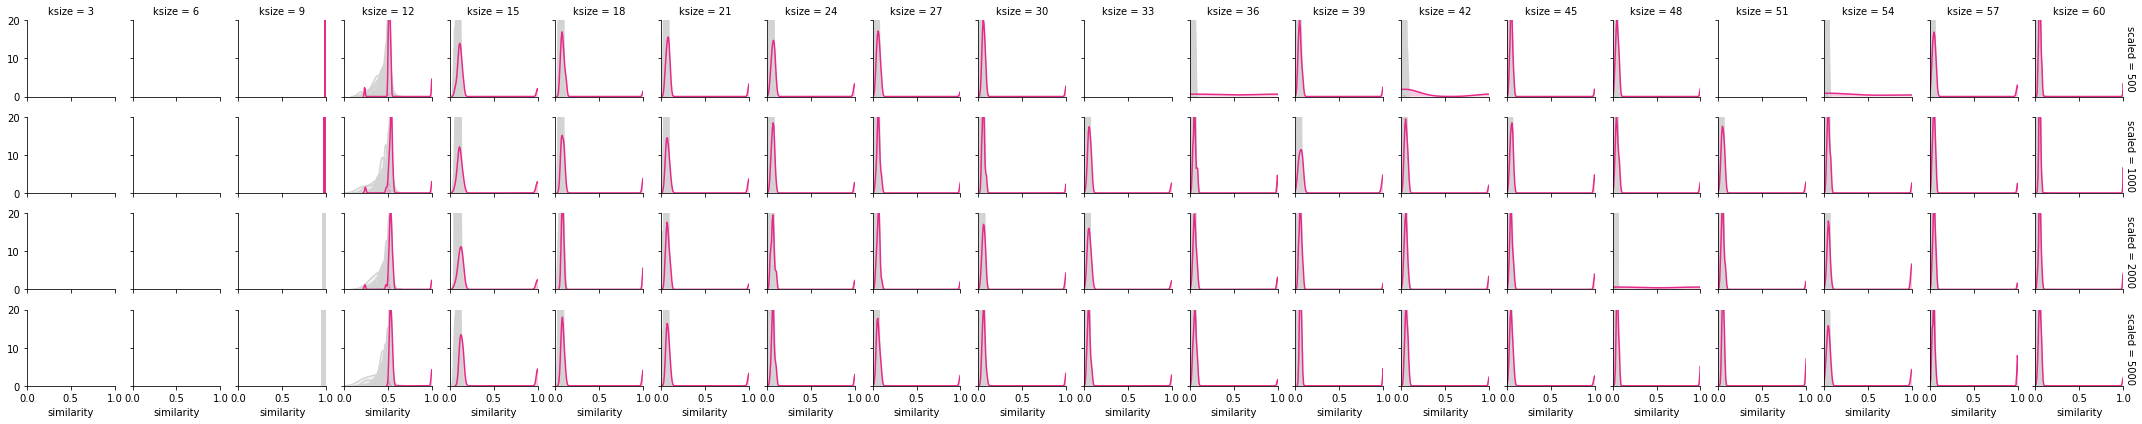

In [199]:
g = sns.FacetGrid(similarity_bladder_cell, col='ksize', row='scaled', 
                  margin_titles=True, size=1.5, **tissue_kws)
g.map(sns.kdeplot, 'similarity', shade=True)
g.set(xlim=(0, 1), ylim=(0, 20), xticks=[0, 0.5, 1])
# g.add_legend()

In [ ]:
g = sns.FacetGrid(similarity_bladder_cell, col='ksize', margin_titles=True, col_wrap=4, sharex=False, **tissue_kws)
g.map(sns.pointplot, 'scaled', 'similarity', estimator=np.median)
g.add_legend()

/home/olga/miniconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


### only look within bladder cells

In [ ]:
similarity_bladder_cell_within_bladder = similarity_bladder_cell.query('tissue == "Bladder"')
print(similarity_bladder_cell_within_bladder.shape)
similarity_bladder_cell_within_bladder.head()

In [ ]:
similarity_bladder_cell_within_bladder.scaled.unique()

In [ ]:
g = sns.FacetGrid(similarity_bladder_cell_within_bladder, hue='cell_ontology_class', 
                  col='ksize', col_wrap=4, sharex=False)
g.map(sns.pointplot, 'scaled', 'similarity', estimator=np.median, dodge=True)
g.add_legend()

In [ ]:
g = sns.FacetGrid(similarity_bladder_cell_within_bladder, hue='cell_ontology_free_annotation', 
                  col='ksize', col_wrap=4, sharex=False)
g.map(sns.pointplot, 'scaled', 'similarity', estimator=np.median, dodge=True)
g.add_legend()

In [ ]:
g = sns.FacetGrid(similarity_bladder_cell_within_bladder, hue='cell_ontology_class', 
                  col='ksize', col_wrap=4)
g.map(sns.violinplot, 'scaled', 'similarity', cut=True, dodge=True)
g.add_legend()

In [ ]:
g = sns.FacetGrid(similarity_bladder_cell_within_bladder, hue='ksize', 
                  col='scaled', col_wrap=4, palette='magma_r')
g.map(sns.kdeplot, 'similarity', shade=True)
g.set(xlim=(0, 1))
g.add_legend()

In [ ]:
g = sns.FacetGrid(similarity_bladder_cell_within_bladder, hue='cell_ontology_class', 
                  col='ksize', col_wrap=4)
g.map(sns.kdeplot, 'similarity', shade=True)
g.set(xlim=(0, 1))
g.add_legend()

In [ ]:
g = sns.FacetGrid(similarity_bladder_cell_within_bladder, hue='cell_ontology_class', 
                  col='scaled', row='ksize')
g.map(sns.kdeplot, 'similarity', shade=True)
g.set(xlim=(0, 1))
g.add_legend()

In [ ]:
g = sns.FacetGrid(similarity_bladder_cell_within_bladder, hue='cell_ontology_class', 
                  col='scaled', row='ksize')
g.map(sns.kdeplot, 'similarity', shade=True)
g.set(xlim=(0, 0.2))
g.add_legend()

In [ ]:
g = sns.FacetGrid(similarity_bladder_cell_within_bladder, hue='cell_ontology_free_annotation', 
                  col='scaled', col_wrap=4)
g.map(sns.kdeplot, 'similarity', shade=True)
g.set(xlim=(0, 1))
g.add_legend()

In [ ]:
g = sns.FacetGrid(similarity_bladder_cell_within_bladder, hue='cell_ontology_free_annotation', 
                  col='scaled', col_wrap=4)
g.map(sns.kdeplot, 'similarity', shade=True)
g.set(xlim=(0, 0.2))
g.add_legend()

## Compare to similarity for pancreatic beta cell (insulin-producing cell)

In [ ]:
cell_metadata.query('tissue == "Pancreas"').head(10)

In [ ]:
type_b_pancreatic_cell = 'F12-MAA000574-3_8_M-1-1'

similarity_pancreatic_cell = compare_results_trim_true.query('cell_id == @type_b_pancreatic_cell')
similarity_pancreatic_cell = similarity_pancreatic_cell.join(cell_metadata, on='other_cell')
similarity_pancreatic_cell = similarity_pancreatic_cell.join(experiment_metadata, on='experiment')
print(similarity_pancreatic_cell.shape)
similarity_pancreatic_cell.head()

In [ ]:
g = sns.FacetGrid(similarity_pancreatic_cell, hue='ksize', col_wrap=4, col='scaled', palette='magma')
g.map(sns.distplot, 'similarity')
g.add_legend()

In [ ]:
similarity_bladder_cell_within_bladder.similarity.describe()

## Compare to similarity to Spleen B cell

In [48]:
cell_metadata.query('tissue == "Spleen"').head()

,tissue,subtissue,cell_ontology_class,free_annotation,cell_ontology_free_annotation
cell_id,,,,,
A20-B000971-3_39_F-1-1,Spleen,NaN,B_cell,NaN,B_cell (NA)
B15-MAA000779-3_11_M-1-1,Spleen,NaN,B_cell,NaN,B_cell (NA)
B21-MAA000559-3_8_M-1-1,Spleen,NaN,B_cell,NaN,B_cell (NA)
C1-MAA000776-3_10_M-1-1,Spleen,NaN,B_cell,NaN,B_cell (NA)
C2-MAA000508-3_9_M-1-1,Spleen,NaN,B_cell,NaN,B_cell (NA)


In [ ]:
spleen_b_cell = 'A20-B000971-3_39_F-1-1'